<a href="https://colab.research.google.com/github/Sa1syo/NLTK/blob/main/IRNLP2019_Ex10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10. Analyzing Sentence Structure (Ch.8)

For International Students: goto http://www.nltk.org/book/ch08.html  
Almost corresponded about:

Lesson 1: 8.1 Some Grammatical Dilemmas  
Lesson 2: 8.2 What's the Use of Syntax? 
Lesson 3: 8.3 Context Free Grammar  
Lesson 4: 8.4 Parsing With Context Free Grammar  
Lesson 5: 8.5 Dependencies and Dependency Grammar  
Lesson 6: 8.6 Grammar Development 

(★ Assignment Remark): Please read carefully about 8.3 and 8.4.

Today's Topic:

The purpose of this chapter is to answer the following questions:　
- How do you describe the structure of an unlimited set of sentences using formal grammar?
- How do you express a sentence structure using a parse tree?
- How does the parser analyze a sentence and automatically build a parse tree?

これまでの章:
- 単語の識別方法
- 構造の分析方法
- 語彙カテゴリへの割り当て方法
- 意味へのアクセス方法
- 単語列またはn-gramでパターンを識別する方法

を見ましたが、自然言語のあいまいさに対処する方法が必要です。

この章の目的は、次の質問に答えることです。

- 形式文法を使用して、無制限の文の集合の構造を説明するにはどうすればよいでしょうか。
- 構文木を使って文の構造をどのように表現するのでしょうか。
- パーサーはどのようにして文を分析し、自動的に構文木を構築しますか？

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

## 10.1 Some Grammatical Dilemmas
### 10.1.1 Linguistic Data and Unlimited Possibilities

曖昧さ: 例) コーパスの正しさ/ 「the of」のパターンは間違った使い方であるにもかかわらず、非常に多くWeb上で見つけられる＝用法としては英語の一部ではないというはず。

→ 文法的に即していない事象を英語話者は確実に判断することができる。

同様にして、英語話者が正しい英語文であると同意できる新しい文を『埋め込み』によってつくることができる。
- a. Usain Bolt broke the 100m record
- b. The Jamaica Observer reported that Usain Bolt broke the 100m record
- c. Andre said The Jamaica Observer reported that Usain Bolt broke the 100m record
- d. I think Andre said the Jamaica Observer reported that Usain Bolt broke the 100m record

S: 文, 文の埋め込み。 S but S や S when Sなど。例) くまのプーさん: S but S when S.

    [You can imagine Piglet's joy when at last the ship came in sight of him.] In after-years he liked to think that he had been in Very Great Danger during the Terrible Flood, but the only danger he had really been in was the last half-hour of his imprisonment, when Owl, who had just flown up, sat on a branch of his tree to comfort him, and told him a very long story about an aunt who had once laid a seagull's egg by mistake, and the story went on and on, rather like this sentence, until Piglet who was listening out of his window without much hope, went to sleep quietly and naturally, slipping slowly out of the window towards the water until he was only hanging on by his toes, at which moment, luckily, a sudden loud squawk from Owl, which was really part of the story, being what his aunt said, woke the Piglet up and just gave him time to jerk himself back into safety and say, "How interesting, and did she?" when — well, you can imagine his joy when at last he saw the good ship, Brain of Pooh (Captain, C. Robin; 1st Mate, P. Bear) coming over the sea to rescue him...

### 10.1.2. Ubiquitous Ambiguity

曖昧性の有名な例: グルーチョ・マルクスの『けだもの組合（Animal Crackers)』に出る文より

- While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know.

この中の、 I shot an elephant in my pajamas. という句の曖昧性

In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)


(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


(a) 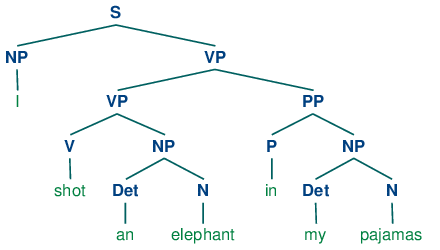
 - パジャマの中”で”ゾウを撃つ


(b)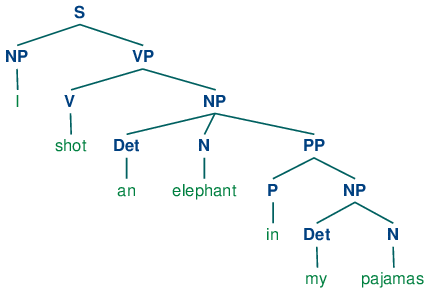 
- パジャマの中"の"ゾウを撃つ

## 10.2. What's the Use of Syntax?
### 10.2.1. Beyond n-grams

Bigramを用いた計算によって文として照合された2つの例
- a. He roared with me the pail slip down his back
- b. The worst part and clumsy looking for whoever heard light

これら自身は直観的に意味をなさない「ワードサラダ（意味を成さない文）」である。しかし、どこが問題か、突き止めるのは難しいかもしれない。文法を勉強するメリットの1つには、この直感を詳しく説明するための『概念的枠組み』と『語彙』とを提供できる。

- 「等位構造」 = v_1とv_2が共にXという文法範疇に属する句であるとするならば、「v_1 and v_2」もまた範疇Xに属する句である。

例)
- a. The book's ending was (NP the worst part and the best part) for me.
- b. On land they are (AP slow and clumsy looking).

等位接続ではNP (Noun Phrase)とAP (Adjective Phrase)を接続できない。
 → 前述「the worst part and clumsy looking」という部分が非文法的である理由。

置き換え可能: The little bear saw the fine fat trout in the brook.
 → The little bearを代名詞『He』によって置き換えることができる。＝前者が1つの単位である。
例)
- a. He saw the fine fat trout in the brook. (文法的)
- b. *The he the fine fat trout in the brook. (非文法的)




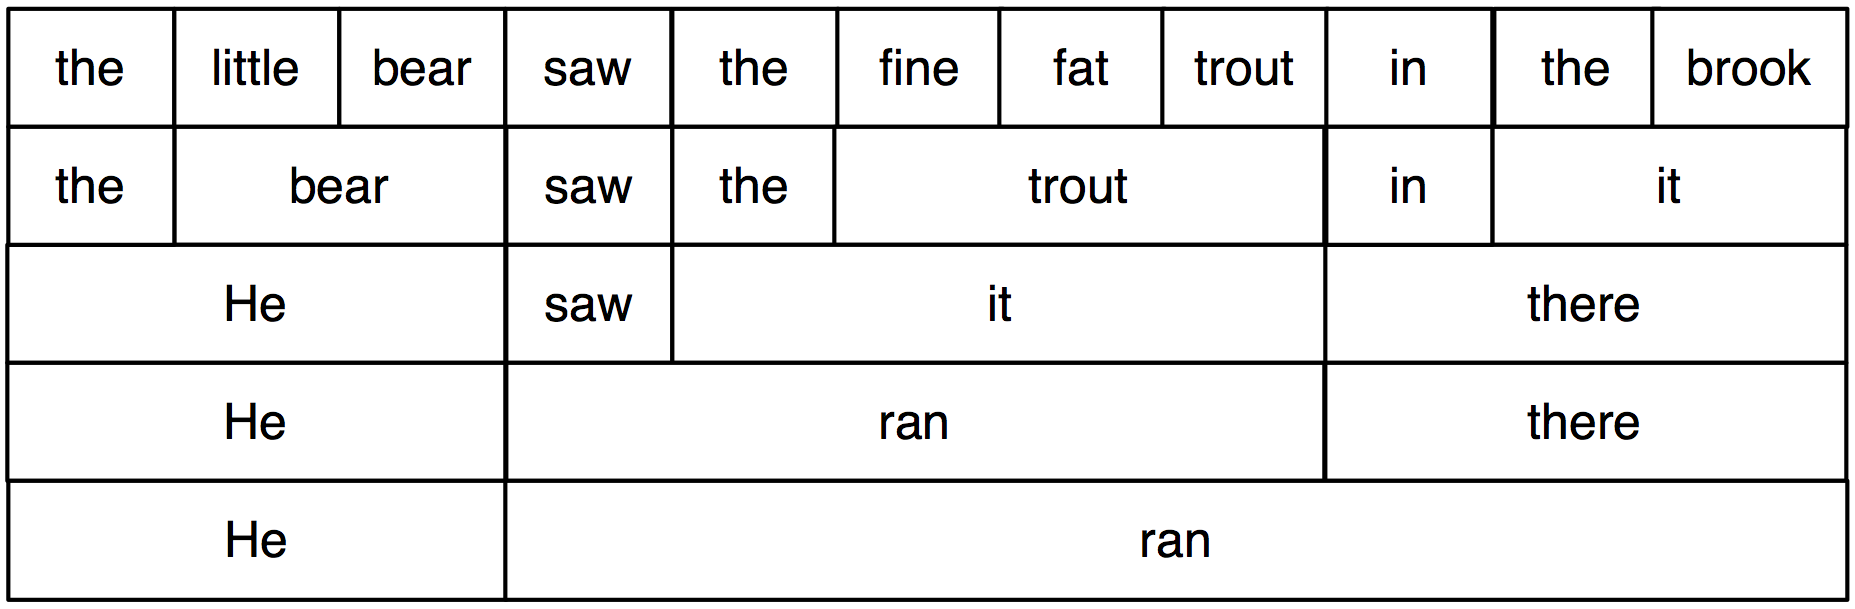
Substitution of Word Sequences: 特定の単語列（例：the brook）を個々の単語（例：it）で置き換えることができます。このプロセスを繰り返すと、文法的な2語の文章になります。

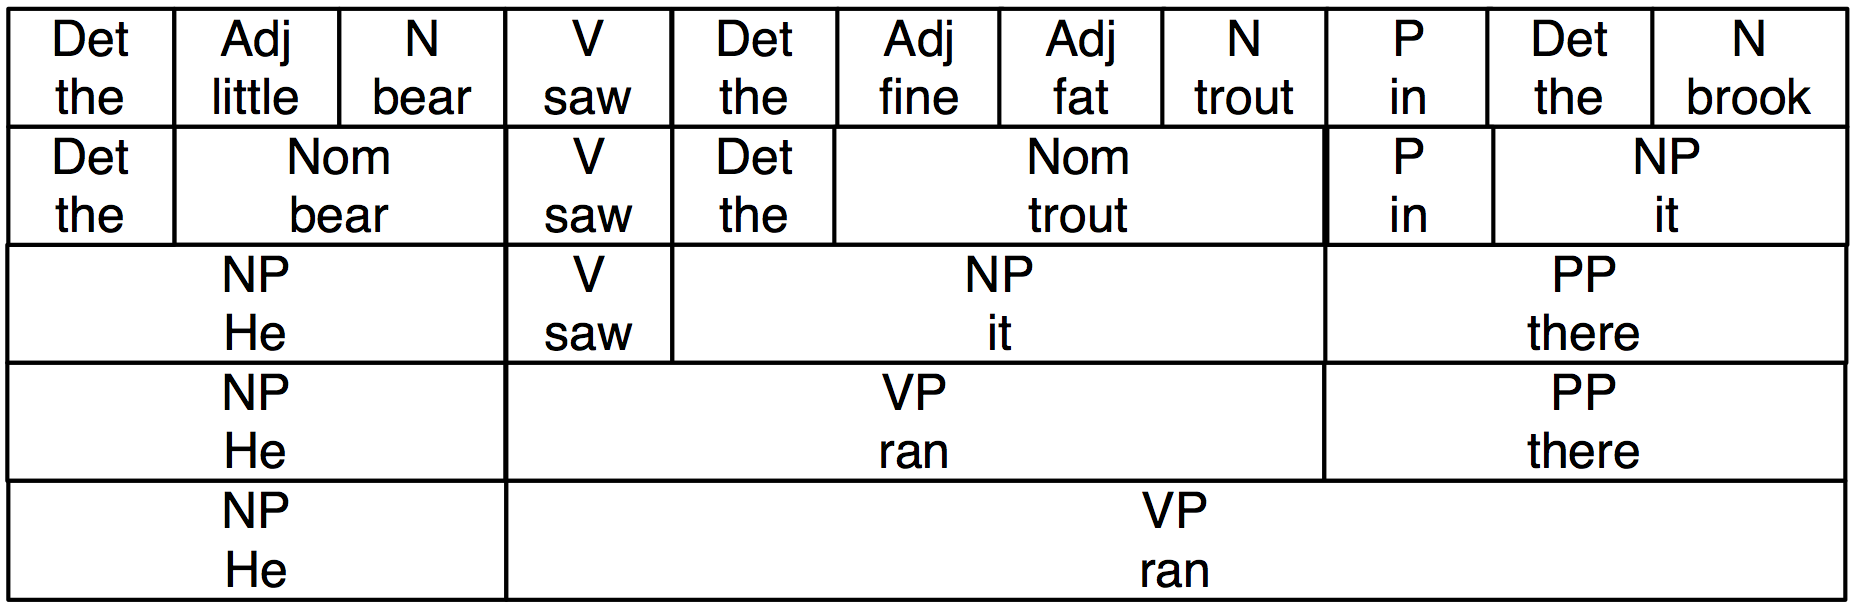

Substitution of Word Sequences Plus Grammatical Categories:　名詞句（ NP）、動詞句（ VP）、前置詞句（ PP）、および名詞語句（ Nom）に対応する文法範疇を付与し、同じ操作を再現したものです。

上記の例の最初の列以外から単語を取り除き、節点Sを加えて図をひっくり返すと、下記のような普通の句構造木が得られる。この木構造の各接点（単語を含む）は、『構成素』と呼ばれる。Sの直接構成素はNPとVPである
![image.png](attachment:image.png)

## 10.3. Context Free Grammar
### 10.3.1. A Simple Grammar

文脈自由文法の生成例: NLTKでは、文脈自由文法はnltk.grammarモジュールで定義されている。以下では、文法を定義して、この文法に沿って的確な文の構造解析について示す

In [ ]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [ ]:
sent = "John saw a cat with Mary by the telescope in the park".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
     print(tree)

(S
  (NP John)
  (VP
    (V saw)
    (NP (Det a) (N cat) (PP (P with) (NP Mary)))
    (PP
      (P by)
      (NP
        (Det the)
        (N telescope)
        (PP (P in) (NP (Det the) (N park)))))))


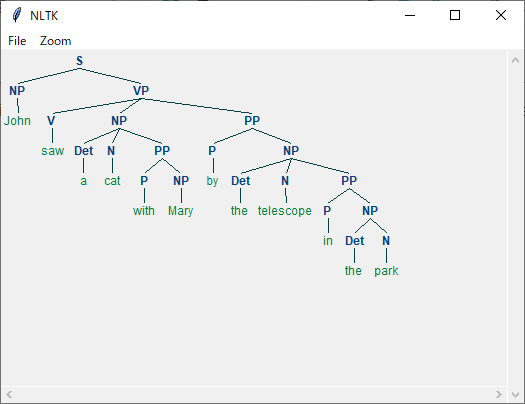

縦棒 (|)は、"または"を意味する生成規則の省略形。

例) The dog saw a man in the park の構文解析

In [ ]:
sent = "the dog saw a man in the park".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
     print(tree)

(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


(a)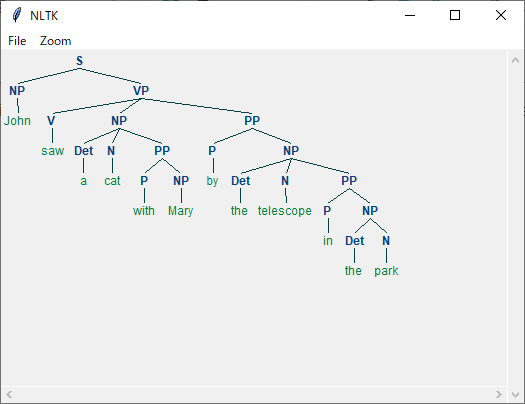

(b)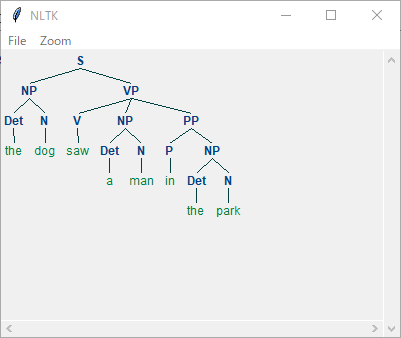

ここで構築した文法では、この文に対して2つの木を許容するため、この文は『構造的に曖昧』であるという。＝前置詞句負荷の曖昧性。

### 10.3.2. 自分自身の文法を定義する

<b><font color="red">※ この部分は大学環境で行ってください。Google Colabではできません。<br>
"This part can't do on google colab."</font></b>

CFGを書いてみたいと思うならば、例えばmygrammar.cfgのようなテキストファイルを作って、そこに自分自身の文法を記述すると良い。それをNLTKにロードして、以下のように構文解析に使うことができる。

In [ ]:
import nltk
nltk.app.rdparser_app.app()

TclError: ignored

[nltk.app.rdparser_app.app()](https://drive.google.com/file/d/1skGXH2Y9I7ltWavd5hituGKq8p3XZFZY/view?usp=sharing) - sample video

In [ ]:
nltk.app.srparser_app.app()

[nltk.app.srparser_app.app()](https://drive.google.com/file/d/165dl6aIB35zCXNrT7mjHswuppCgz6iaX/view?usp=sharing) - sample video

In [ ]:

nltk.app.chartparser_app.app()

grammar= (
('    ', 'S -> NP VP,')
('    ', 'VP -> VP PP,')
('    ', 'VP -> V NP,')
('    ', 'VP -> V,')
('    ', 'NP -> Det N,')
('    ', 'NP -> NP PP,')
('    ', 'PP -> P NP,')
('    ', "NP -> 'John',")
('    ', "NP -> 'I',")
('    ', "Det -> 'the',")
('    ', "Det -> 'my',")
('    ', "Det -> 'a',")
('    ', "N -> 'dog',")
('    ', "N -> 'cookie',")
('    ', "N -> 'table',")
('    ', "N -> 'cake',")
('    ', "N -> 'fork',")
('    ', "V -> 'ate',")
('    ', "V -> 'saw',")
('    ', "P -> 'on',")
('    ', "P -> 'under',")
('    ', "P -> 'with',")
)
tokens = ['John', 'ate', 'the', 'cake', 'on', 'the', 'table']
Calling "ChartParserApp(grammar, tokens)"...
Error creating Tree View


TclError: ignored

![image.png](attachment:image.png)

mygrammar.cfg の中身

    S -> NP VP
    VP -> V NP | V NP PP
    PP -> P NP
    V -> "saw" | "ate" | "walked"
    NP -> "John" | "Mary" | "Bob" | "I" | Det N | Det N PP
    Det -> "a" | "an" | "the" | "my"
    N -> "man" | "dog" | "cat" | "telescope" | "park"
    P -> "in" | "on" | "by" | "with"

注意) スペースを含めない。拡張子は.cfgのみ。print(tree)を行って何も出力が出なければ不適合。

- rd_parser = nltk.RecursiveDesentParser(grammer1, trace=2)のように、トレースを御にして、構文解析木を呼び出してチェックしてみる。
- また、どのような文法の生成規則を持っているかを、for p in grammar1.productions(): print p というコマンドを使って調べられる。

In [ ]:
grammar1 = nltk.data.load('file:mygrammar.cfg')
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
     print(tree)

# Exercise Attendance

Please define your grammer as mygrammer1, then please parse a sentense as follows using recursive descent parser:  
"the professor said that he would give an exam on Monday"  

Hint: the following state is acceptable.
- AUX -> "would"
- SconJ -> "that"
- VP -> AUX VP # would V case
- NP -> SconJ S # that connection case

Template is follows:

In [ ]:
 mygrammar1 = nltk.CFG.fromstring("""  
  S -> NP VP
  VP -> V NP | V NP PP | AUX VP
  PP -> P NP
  V -> "said" | "give" 
  NP -> "Monday" | "he" | Det N | Det N PP | SconJ S 
  Det -> "a" | "an" | "the" | "my" 
  SconJ -> "that"
  AUX -> "would"
  N -> "professor" | "exam" 
  P -> "in" | "on" | "by" | "with" 
  """)  
sent = "the professor said that he would give an exam on Monday".split()
rd_parser = nltk.RecursiveDescentParser(mygrammar1)
for tree in rd_parser.parse(sent):
     print(tree)

(S
  (NP (Det the) (N professor))
  (VP
    (V said)
    (NP
      (SconJ that)
      (S
        (NP he)
        (VP
          (AUX would)
          (VP
            (V give)
            (NP (Det an) (N exam) (PP (P on) (NP Monday)))))))))
(S
  (NP (Det the) (N professor))
  (VP
    (V said)
    (NP
      (SconJ that)
      (S
        (NP he)
        (VP
          (AUX would)
          (VP
            (V give)
            (NP (Det an) (N exam))
            (PP (P on) (NP Monday))))))))
(S
  (NP (Det the) (N professor))
  (VP
    (V said)
    (NP
      (SconJ that)
      (S
        (NP he)
        (VP (AUX would) (VP (V give) (NP (Det an) (N exam))))))
    (PP (P on) (NP Monday))))


    mygrammar1 = nltk.CFG.fromstring("""  
      S ->   
      VP ->   
      PP ->   
      V ->   
      NP ->   
      AUX ->   
      Det ->
      SconJ ->
      N ->   
      P ->   
      """)  
    sent = "the professor said that he would give an exam on Monday".split()  
    rd_parser = nltk.RecursiveDescentParser(mygrammar1)  
    for tree in rd_parser.parse(sent):  
         print(tree)  

- Output result

    (S
      (NP (Det the) (N professor))
      (VP
        (V said)
        (NP
          (SconJ that)
          (S
            (NP he)
            (VP
              (AUX would)
              (VP
                (V give)
                (NP (Det an) (N exam) (PP (P on) (NP Monday)))))))))
    (S
      (NP (Det the) (N professor))
      (VP
        (V said)
        (NP
          (SconJ that)
          (S
            (NP he)
            (VP
              (AUX would)
              (VP
                (V give)
                (NP (Det an) (N exam))
                (PP (P on) (NP Monday))))))))
    (S
      (NP (Det the) (N professor))
      (VP
        (V said)
        (NP
          (SconJ that)
          (S
            (NP he)
            (VP (AUX would) (VP (V give) (NP (Det an) (N exam))))))
        (PP (P on) (NP Monday))))

### 10.3.3   Recursion in Syntactic Structure
再帰的な分布: Nom -> Adj Nom　という生成規則は、範疇Nomに対して直接再起を含んでいるが、S->NP VPと、VP -> V S の2つの生成規則の組み合わせで、Sに対する間接的な再帰が発生している。

In [ ]:
grammar2 = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> Det Nom | PropN
  Nom -> Adj Nom | N
  VP -> V Adj | V NP | V S | V NP PP
  PP -> P NP
  PropN -> 'Buster' | 'Chatterer' | 'Joe'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  Adj  -> 'angry' | 'frightened' |  'little' | 'tall'
  V ->  'chased'  | 'saw' | 'said' | 'thought' | 'was' | 'put'
  P -> 'on'
  """)

In [ ]:
sent = "the angry bear chased the frightened little squirrel".split()
rd_parser = nltk.RecursiveDescentParser(grammar2)
for tree in rd_parser.parse(sent):
     print(tree)
#tree.draw()

(S
  (NP (Det the) (Nom (Adj angry) (Nom (N bear))))
  (VP
    (V chased)
    (NP
      (Det the)
      (Nom (Adj frightened) (Nom (Adj little) (Nom (N squirrel)))))))


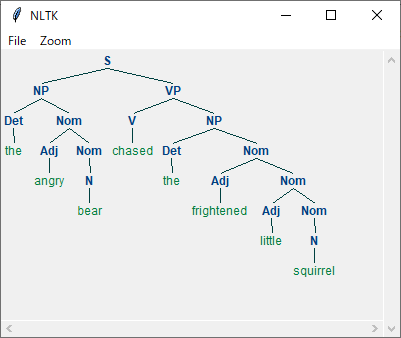

In [ ]:
sent = "Chatterer said Buster thought the tree was tall ".split()
rd_parser = nltk.RecursiveDescentParser(grammar2)
for tree in rd_parser.parse(sent):
     print(tree)
#tree.draw()

(S
  (NP (PropN Chatterer))
  (VP
    (V said)
    (S
      (NP (PropN Buster))
      (VP
        (V thought)
        (S (NP (Det the) (Nom (N tree))) (VP (V was) (Adj tall)))))))


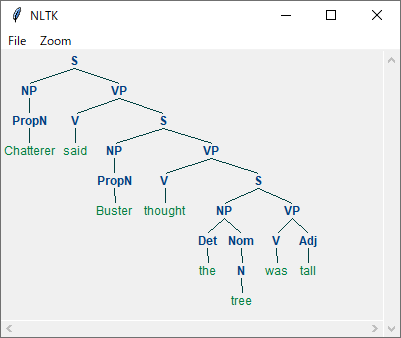

RecursiveDescentParserは、X->X Yという形の左再帰的な生成規則を扱うことができない。（右側に再帰になることはできる）。
## 10.4. Parsing With Context Free Grammar

構文解析器は、文法の生成規則に従って入力文を処理し、文法に沿った1つ以上の構成素構造を作り上げる。
- 文法: 「適格性」に対する宣言的な記述である（〇文字列。×プログラム）

アルゴリズム
- 再帰下降構文解析（トップダウン法）
- Shift-Reduce構文解析 (ボトムアップ法)
- 複合
 - 左隅構文解析（ボトムアップフィルタを含んだトップダウン法）
 - チャート法構文解析（動的計画法）


### 10.4.1. Recursive Descent Parsing
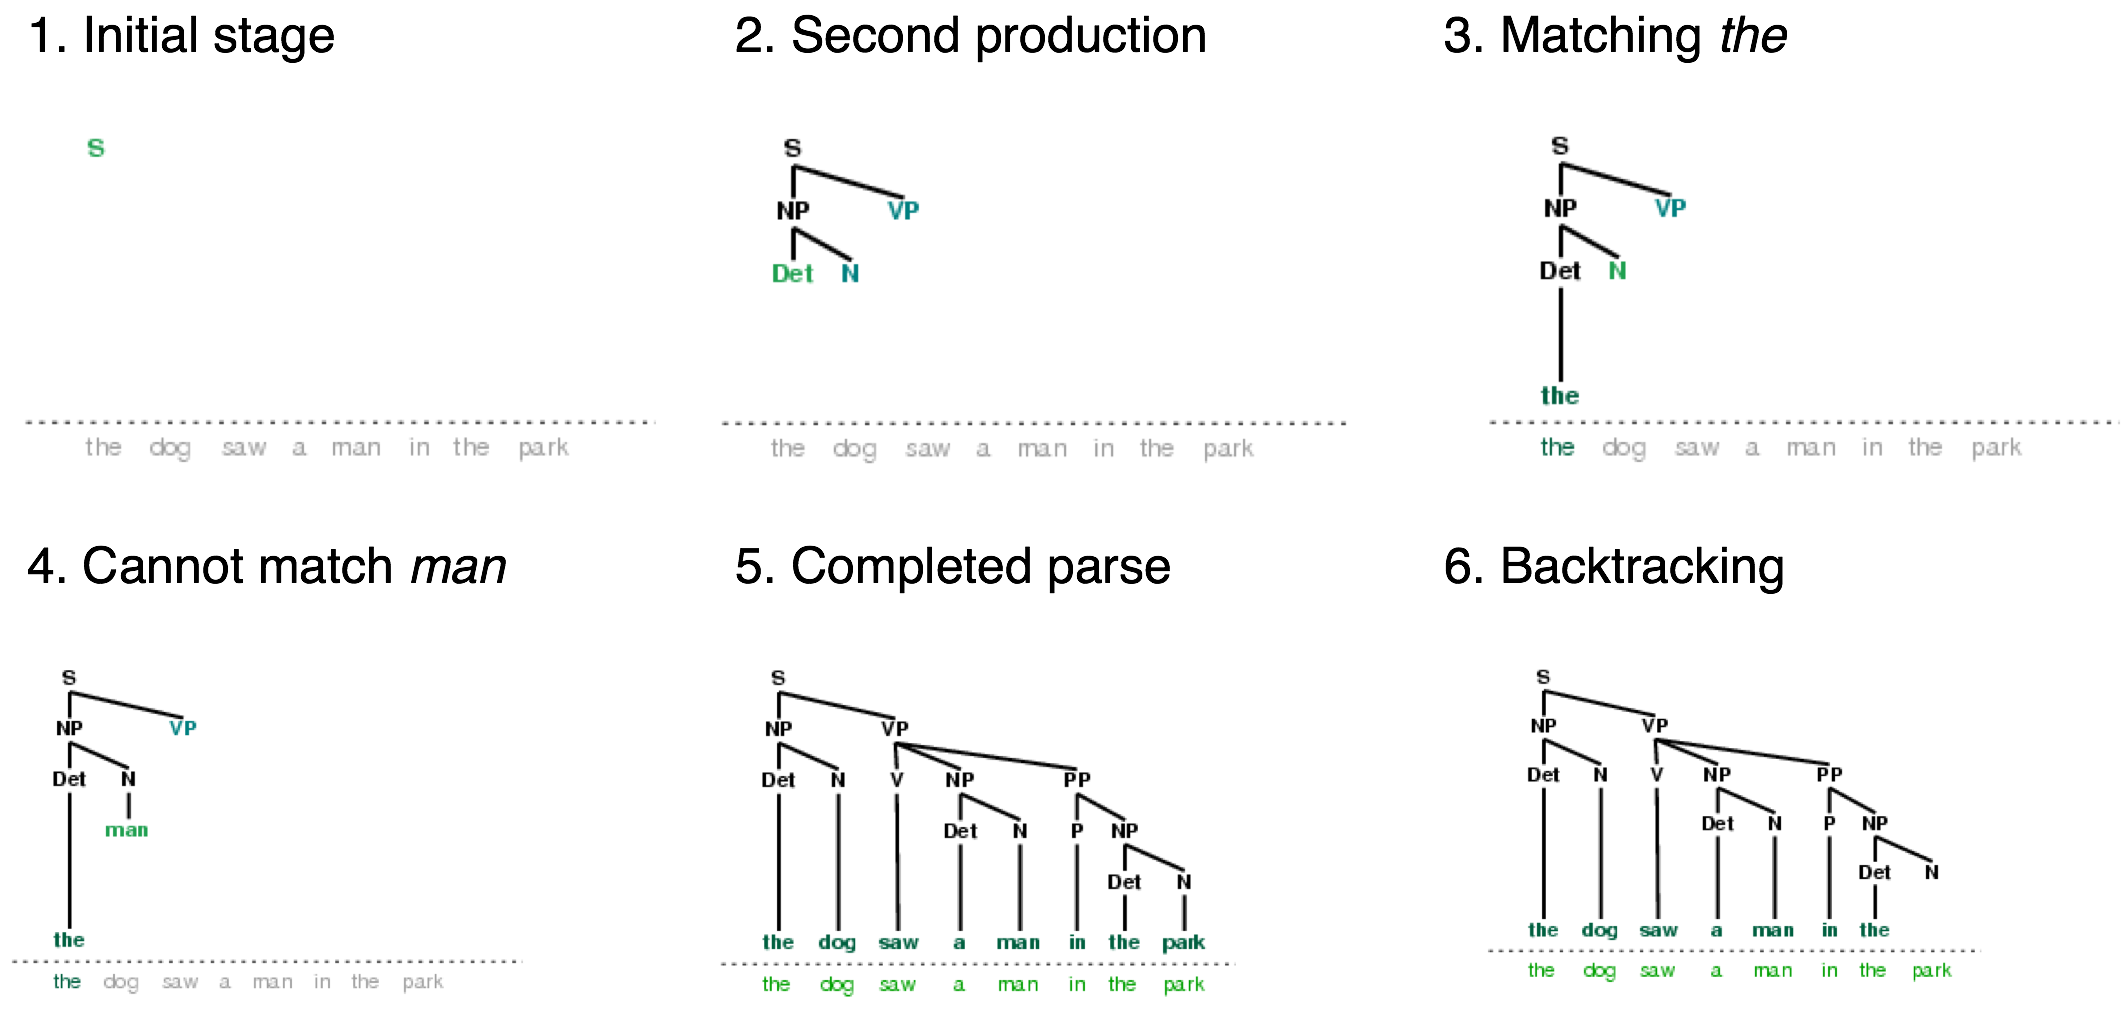

In [ ]:
rd_parser = nltk.RecursiveDescentParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


In [ ]:
nltk.parse.chart.demo(1, print_times=False, trace=1,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Top-down

|.  I   . saw  . John . with .  a   . dog  .|
|[------]      .      .      .      .      .| [0:1] 'I'
|.      [------]      .      .      .      .| [1:2] 'saw'
|.      .      [------]      .      .      .| [2:3] 'John'
|.      .      .      [------]      .      .| [3:4] 'with'
|.      .      .      .      [------]      .| [4:5] 'a'
|.      .      .      .      .      [------]| [5:6] 'dog'
|>      .      .      .      .      .      .| [0:0] S  -> * NP VP
|>      .      .      .      .      .      .| [0:0] NP -> * NP PP
|>      .      .      .      .      .      .| [0:0] NP -> * Det Noun
|>      .      .      .      .      .      .| [0:0] NP -> * 'I'
|[------]      .      .      .      .      .| [0:1] NP -> 'I' *
|[------>      .      .      .      .      .| [0:1] S  -> NP * VP
|[------>      .      .      .      .      .| [0:1] NP -> NP * PP
|.      >      .      .      .      .      .| [1:

### 10.4.2. Shift-Reduce Parsing
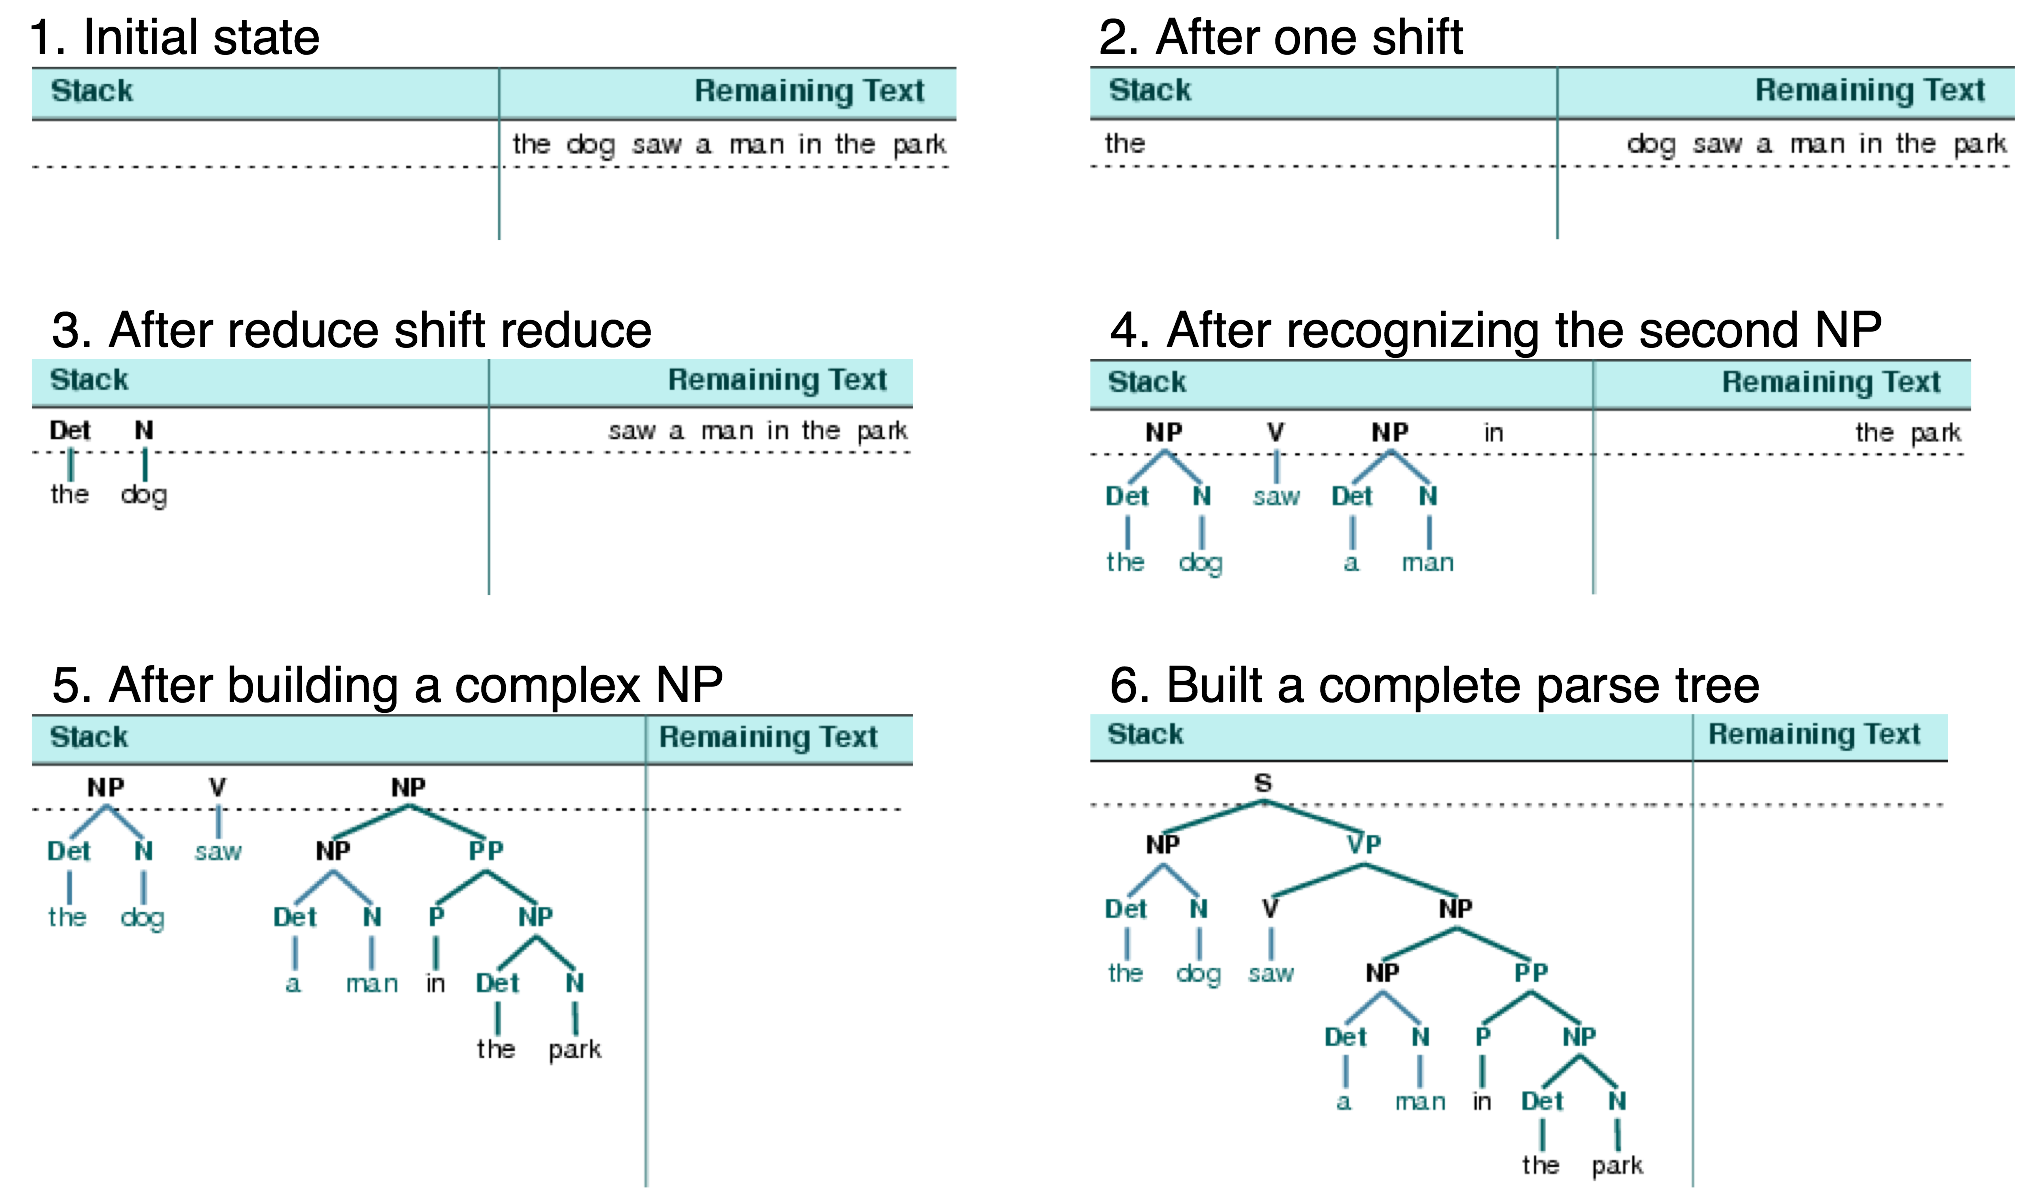

In [ ]:
sr_parser = nltk.ShiftReduceParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
    print(tree) 

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


In [ ]:
nltk.parse.chart.demo(2, print_times=False, trace=1,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up

|.  I   . saw  . John . with .  a   . dog  .|
|[------]      .      .      .      .      .| [0:1] 'I'
|.      [------]      .      .      .      .| [1:2] 'saw'
|.      .      [------]      .      .      .| [2:3] 'John'
|.      .      .      [------]      .      .| [3:4] 'with'
|.      .      .      .      [------]      .| [4:5] 'a'
|.      .      .      .      .      [------]| [5:6] 'dog'
|>      .      .      .      .      .      .| [0:0] NP -> * 'I'
|[------]      .      .      .      .      .| [0:1] NP -> 'I' *
|>      .      .      .      .      .      .| [0:0] S  -> * NP VP
|>      .      .      .      .      .      .| [0:0] NP -> * NP PP
|[------>      .      .      .      .      .| [0:1] S  -> NP * VP
|[------>      .      .      .      .      .| [0:1] NP -> NP * PP
|.      >      .      .      .      .      .| [1:1] Verb -> * 'saw'
|.      [------]      .      .      .      .| [1:

### 10.4.3. The Left-Corner Parser
再帰降下パーサの問題点の1つは、左再帰的生成に遭遇すると無限ループに陥ることです。これは、実際の入力文を考慮せずに文法生成を盲目的に適用するためです。左隅パーサーは、これまで見てきたボトムアップとトップダウンのアプローチを組み合わせたものです。

文法 grammar2を使用すると、 Jhon saw Maryという文の構文を生成できる。

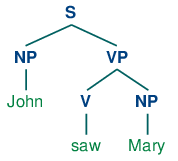

この文法の中には以下のような適用がある。

    NP -> Det N
    NP -> Det N PP
    NP -> "John" | "Mary" | "Bob"

この時、再帰降下構文解析を行おうとすると、3行目を見るはずですが、1行目や2行目に入ってしまい、どのProductionも最初の単語がJohnであるシーケンスを導き出せない。

左隅構文解析は、ボトムアップのフィルタリングを用いたトップダウンパーサーである。
- 解析を始める前に、文脈自由文法を前処理して、1つの表を作成する。この表の各行には2つのセルが含まれており、1つ目のセルには非終端記号が、2詰めのセルにはその非終端記号に対応する左隅の可能性が列挙される。以下の表は、grammar2の文法に対応する表を示す。

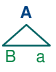

In [ ]:
nltk.parse.chart.demo(3, print_times=False, trace=1,
...                       sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up left-corner

|.  I   . saw  . John . with .  a   . dog  .|
|[------]      .      .      .      .      .| [0:1] 'I'
|.      [------]      .      .      .      .| [1:2] 'saw'
|.      .      [------]      .      .      .| [2:3] 'John'
|.      .      .      [------]      .      .| [3:4] 'with'
|.      .      .      .      [------]      .| [4:5] 'a'
|.      .      .      .      .      [------]| [5:6] 'dog'
|[------]      .      .      .      .      .| [0:1] NP -> 'I' *
|[------>      .      .      .      .      .| [0:1] S  -> NP * VP
|[------>      .      .      .      .      .| [0:1] NP -> NP * PP
|.      [------]      .      .      .      .| [1:2] Verb -> 'saw' *
|.      [------>      .      .      .      .| [1:2] VP -> Verb * NP
|.      [------]      .      .      .      .| [1:2] VP -> Verb *
|.      [------>      .      .      .      .| [1:2] VP -> VP * PP
|[-------------]      .      .    

### 10.4.4. Well-Formed Substring Tables
これまでの単純な構文解析器は、完全性及び効率の両方において限界があった。これらの問題を解決するには、動的計画法のアルゴリズム設計方法を構文解析問題に適用する。

→ 適用したアルゴリズムは『チャート式解析』として知られる。
- 的確部分文字列表 (Well-formed substring table, WFST)というテーブルを利用。

下記の図はチャートデータ構造について。線型グラフ構造の辺ラベルが単語となっている。

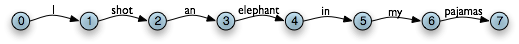

In [ ]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span):
            end = start + span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                        (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst

def display(wfst, tokens):
    print('\nWFST ' + ' '.join(("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst)-1):
        print("%d   " % i, end=" ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end=" ")
        print()

In [ ]:
tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    .    .    .    .    
1    .    V    .    .    .    .    .    
2    .    .    Det  .    .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    .    
5    .    .    .    .    .    Det  .    
6    .    .    .    .    .    .    N    


In [ ]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar)
display(wfst1, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    S    .    .    S    
1    .    V    .    VP   .    .    VP   
2    .    .    Det  NP   .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    PP   
5    .    .    .    .    .    Det  NP   
6    .    .    .    .    .    .    N    


In [ ]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar, trace=True)

[2] Det [3]   N [4] ==> [2]  NP [4]
[5] Det [6]   N [7] ==> [5]  NP [7]
[1]   V [2]  NP [4] ==> [1]  VP [4]
[4]   P [5]  NP [7] ==> [4]  PP [7]
[0]  NP [1]  VP [4] ==> [0]   S [4]
[1]  VP [4]  PP [7] ==> [1]  VP [7]
[0]  NP [1]  VP [7] ==> [0]   S [7]


In [ ]:
nltk.parse.chart.demo(5, print_times=False, trace=1,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Stepping (top-down vs bottom-up)

*** SWITCH TO TOP DOWN
|[------]      .      .      .      .      .| [0:1] 'I'
|.      [------]      .      .      .      .| [1:2] 'saw'
|.      .      [------]      .      .      .| [2:3] 'John'
|.      .      .      [------]      .      .| [3:4] 'with'
|.      .      .      .      [------]      .| [4:5] 'a'
|.      .      .      .      .      [------]| [5:6] 'dog'
|>      .      .      .      .      .      .| [0:0] S  -> * NP VP
|>      .      .      .      .      .      .| [0:0] NP -> * NP PP
|>      .      .      .      .      .      .| [0:0] NP -> * Det Noun
|>      .      .      .      .      .      .| [0:0] NP -> * 'I'
|[------]      .      .      .      .      .| [0:1] NP -> 'I' *
|[------>      .      .      .      .      .| [0:1] S  -> NP * VP
|[------>      .      .      .      .      .| [0:1] NP -> NP * PP
|.      >      .      .      .      .      .| [1

## 10.5. Dependencies and Dependency Grammar
句構造文法は、単語や単語列がどのように結合して構成素を作り上げるのかということに注目した文法である。これとは別の補完的なアプローチとして「依存文法」があり、これは単語の他の単語とどのように関連するかに注目するものである。

- 依存関係とは、主辞と従属語の間に成り立つ非対称の二項関係。
- 文の主辞は時制動詞とするのが普通。
- その他の単語は全て、この文主辞に依存するか、もしくは依存パスを経由して、文主辞に依存するかのどちらかとなる。

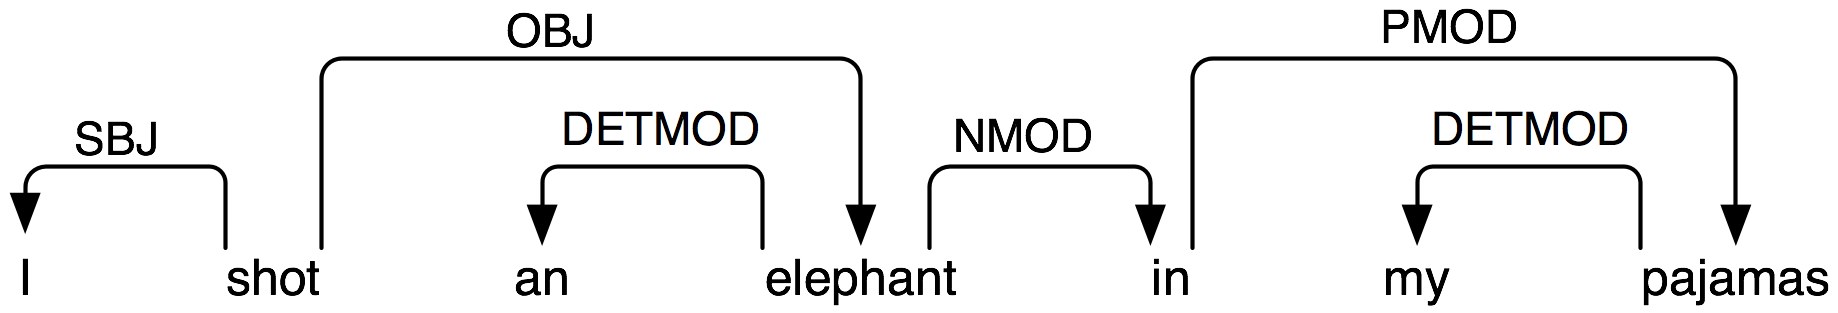

In [ ]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""")
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


ある依存グラフに対して、全ての単語を直線上に順番に配置した際に、全てんお辺が交差することなくかけた場合、そのグラフはProjective（投影的）であるという。これは、ある単語とその単語の全ての子孫が、文内で連続した系列をなすということと等価である。上図も投影的。英文の多くが投影的な依存構文パーサーを用いて構文解析できる。

In [ ]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
    print(tree)
    #tree.draw()

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


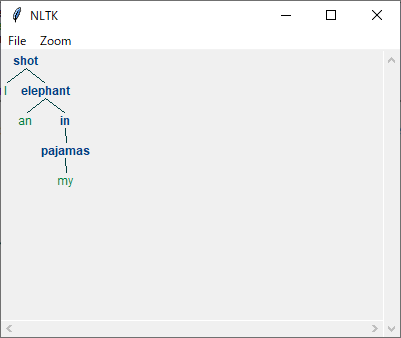



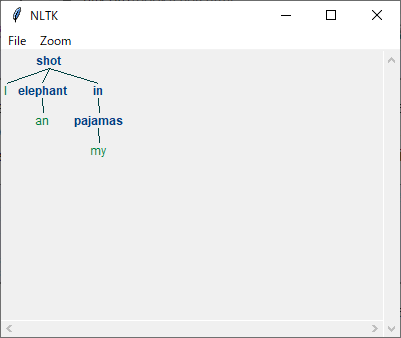

英語よりも柔軟な語順を持つ言語では、非射影の依存関係がより頻繁にあります。

構造Ｃにおいて主辞Ｈとは何か、従属語Ｄとは何かを決定するために様々な基準が提案されてきた。最も重要なものは次のとおりです。

- HはCの配置クラスを決定します。あるいは、Cの外部構文特性はHによるものです。
- HはCの意味的タイプを決定します。
- Hは必須ですが、Dは省略可です。
- HはDを選択し、それが必須かオプションかを決定します。
- Dの形態学的形態は、Hによって決定される（例えば、一致や格の統一など）。

### 10.5.1. Valency and the Lexicon

動詞とその従属語を詳しく見てみましょう。上記grammar2の文法は以下のような文例を正しく生成します

- a.		The squirrel was frightened.
- b.		Chatterer saw the bear.
- c.		Chatterer thought Buster was angry.
- d.		Joe put the fish on the log.

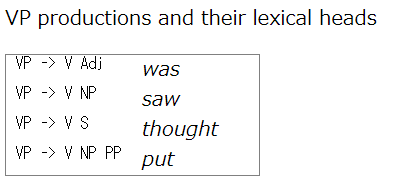![image.png](attachment:image.png)

この生成規則「was」はそれに続くAdjと共に出現し、「saw」はそれに続くNPと共に出現する…という意味。これらの従属語は、それぞれ対応する動詞の『補語』と呼ばれ、どの同士がどのような補語と共に出現するのかについては、強い制約がある。

以下の単語列は不適格となる。
- a.		*The squirrel was Buster was angry.
- b.		*Chatterer saw frightened.
- c.		*Chatterer thought the bear.
- d.		*Joe put on the log.

依存文法の世界では歴史的経緯により、上記表の動詞について異なる『結合価』をもつという言い方をする。結合間お制約は、動詞だけではなく主辞の他のクラスに対しても適用可能である。

## 10.6. 文法の開発
### 10.6.1. Treebankと文法

NLTKのcorpusモジュールは、treebankコーパスに対するリーダーを提供しており、子のコーパスにはPenn Treebank Corpusの10%が含まれている。
文法を開発するためにこのデータを利用することができる。

In [ ]:
nltk.download('treebank')
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
print(t)
#t.draw()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


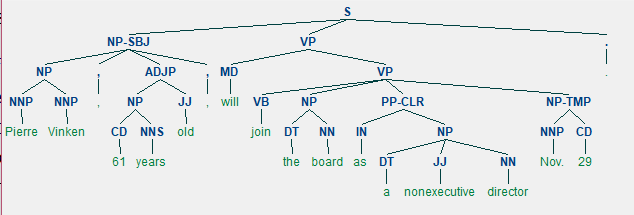

下記プログラムでは、簡単なフィルタを用いることで、補語として文を取る動詞を探している。VP->SV Sという形の生成規則が既にあると仮定すると、この情報によってSVに対する展開に含まれている特定の動詞を見つけることができる。

In [ ]:
def filter(tree):
    child_nodes = [child.label() for child in tree
                   if isinstance(child, nltk.Tree)]
    return  (tree.label() == 'VP') and ('S' in child_nodes)

In [ ]:
from nltk.corpus import treebank
dlst = [subtree for tree in treebank.parsed_sents()
         for subtree in tree.subtrees(filter)]
print(dlst[:10])

[Tree('VP', [Tree('VBN', ['named']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('NP-PRD', [Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('DT', ['this']), Tree('JJ', ['British']), Tree('JJ', ['industrial']), Tree('NN', ['conglomerate'])])])])])]), Tree('VP', [Tree('VBD', ['said']), Tree(',', [',']), Tree('``', ['``']), Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]), Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])]), Tree('VP', [Tree('VBN', ['expected']), Tree('S', [Tree('-NONE-', ['*?*'])])]), Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])]), Tree('VP', [Tree('VBZ', ['appears']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('VP', [Tree('TO', ['to']), Tree('VP', [Tree('VB', ['be']), Tree('NP-PR

PP Attatchment Corpus(nltk.corpus.ppattach)は、特定の動詞の結合価に関するもう1つの情報源です。ここでは、このコーパスをマイニングするための手法を説明します。

ある特定の前置詞と名詞がを持つ前置詞句のペアに対して、動詞の選択によってその前置詞句がVPに付加するか、NPに付加するかが変化するような例を見つける。

In [ ]:
from collections import defaultdict
nltk.download('ppattach')
entries = nltk.corpus.ppattach.attachments('training')
table = defaultdict(lambda: defaultdict(set))
for entry in entries:
    key = entry.noun1 + '-' + entry.prep + '-' + entry.noun2
    table[key][entry.attachment].add(entry.verb)

for key in sorted(table):
    if len(table[key]) > 1:
        print(key, 'N:', sorted(table[key]['N']), 'V:', sorted(table[key]['V']))

[nltk_data] Downloading package ppattach to /root/nltk_data...
[nltk_data]   Package ppattach is already up-to-date!
%-below-level N: ['left'] V: ['be']
%-from-year N: ['was'] V: ['declined', 'dropped', 'fell', 'grew', 'increased', 'plunged', 'rose', 'was']
%-in-August N: ['was'] V: ['climbed', 'fell', 'leaping', 'rising', 'rose']
%-in-September N: ['increased'] V: ['climbed', 'declined', 'dropped', 'edged', 'fell', 'grew', 'plunged', 'rose', 'slipped']
%-in-week N: ['declined'] V: ['was']
%-to-% N: ['add', 'added', 'backed', 'be', 'cut', 'go', 'grow', 'increased', 'increasing', 'is', 'offer', 'plummet', 'reduce', 'rejected', 'rise', 'risen', 'shaved', 'wants', 'yield', 'zapping'] V: ['fell', 'rise', 'slipped']
%-to-million N: ['declining'] V: ['advanced', 'climbed', 'cutting', 'declined', 'declining', 'dived', 'dropped', 'edged', 'fell', 'gained', 'grew', 'increased', 'jump', 'jumped', 'plunged', 'rising', 'rose', 'slid', 'slipped', 'soared', 'tumbled']
1-to-21 N: ['dropped'] V: ['dro

NLTKコーパスコレクションに、Sinica Treebank Corpusからのサンプルも入っており、ここには『Academia Sinica Balanced Corpus of Modern Chinese』からサンプリングした構文解析済みの文が1万文入っている。

In [ ]:
#nltk.corpus.sinica_treebank.parsed_sents()[3450].draw()   

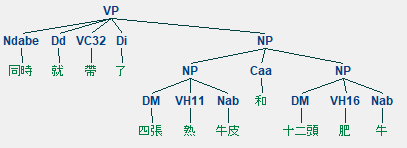

### 10.6.2. 曖昧性の問題
文法のカバー率が増加して、入力文の長さが増加していくと、解析木の数は急速に、天文学的に増加する。

例) fish fish fish (fishは名詞でもあり、動詞でもある）このfish文に対しる『おもちゃ文法』は以下の通り。

In [ ]:
grammar = nltk.CFG.fromstring("""
... S -> NP V NP
... NP -> NP Sbar
... Sbar -> NP V
... NP -> 'fish'
... V -> 'fish'
... """)

ここで、『fish fish fish fish fish』を構文解析してみる。
（用例の一例：『ほかの魚が捕まえる魚は、魚そのものを捕まえる習慣がある』）

2つの解釈がある。

In [ ]:
tokens = ["fish"] * 5
cp = nltk.ChartParser(grammar)
for tree in cp.parse(tokens):
    print(tree)

(S (NP fish) (V fish) (NP (NP fish) (Sbar (NP fish) (V fish))))
(S (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish) (NP fish))


文の長さが3,5,7,...と増加すると、構文木の数も1,2,5,14,42,...と増える。（カタラン数と呼ぶ）。クマのプーさんの子豚の文の長さの半分程度の50程度の長さの文でも10^12個の構文解析が存在することになる。

- Put the block in the box on the table

前置詞句付加の統語的曖昧性も、カタラン数に比例して増加する。

    the are of I
- ワードサラダであるにもかかわらず、文法的には正しい名詞句。(are: アール, Iは場所のI番地）

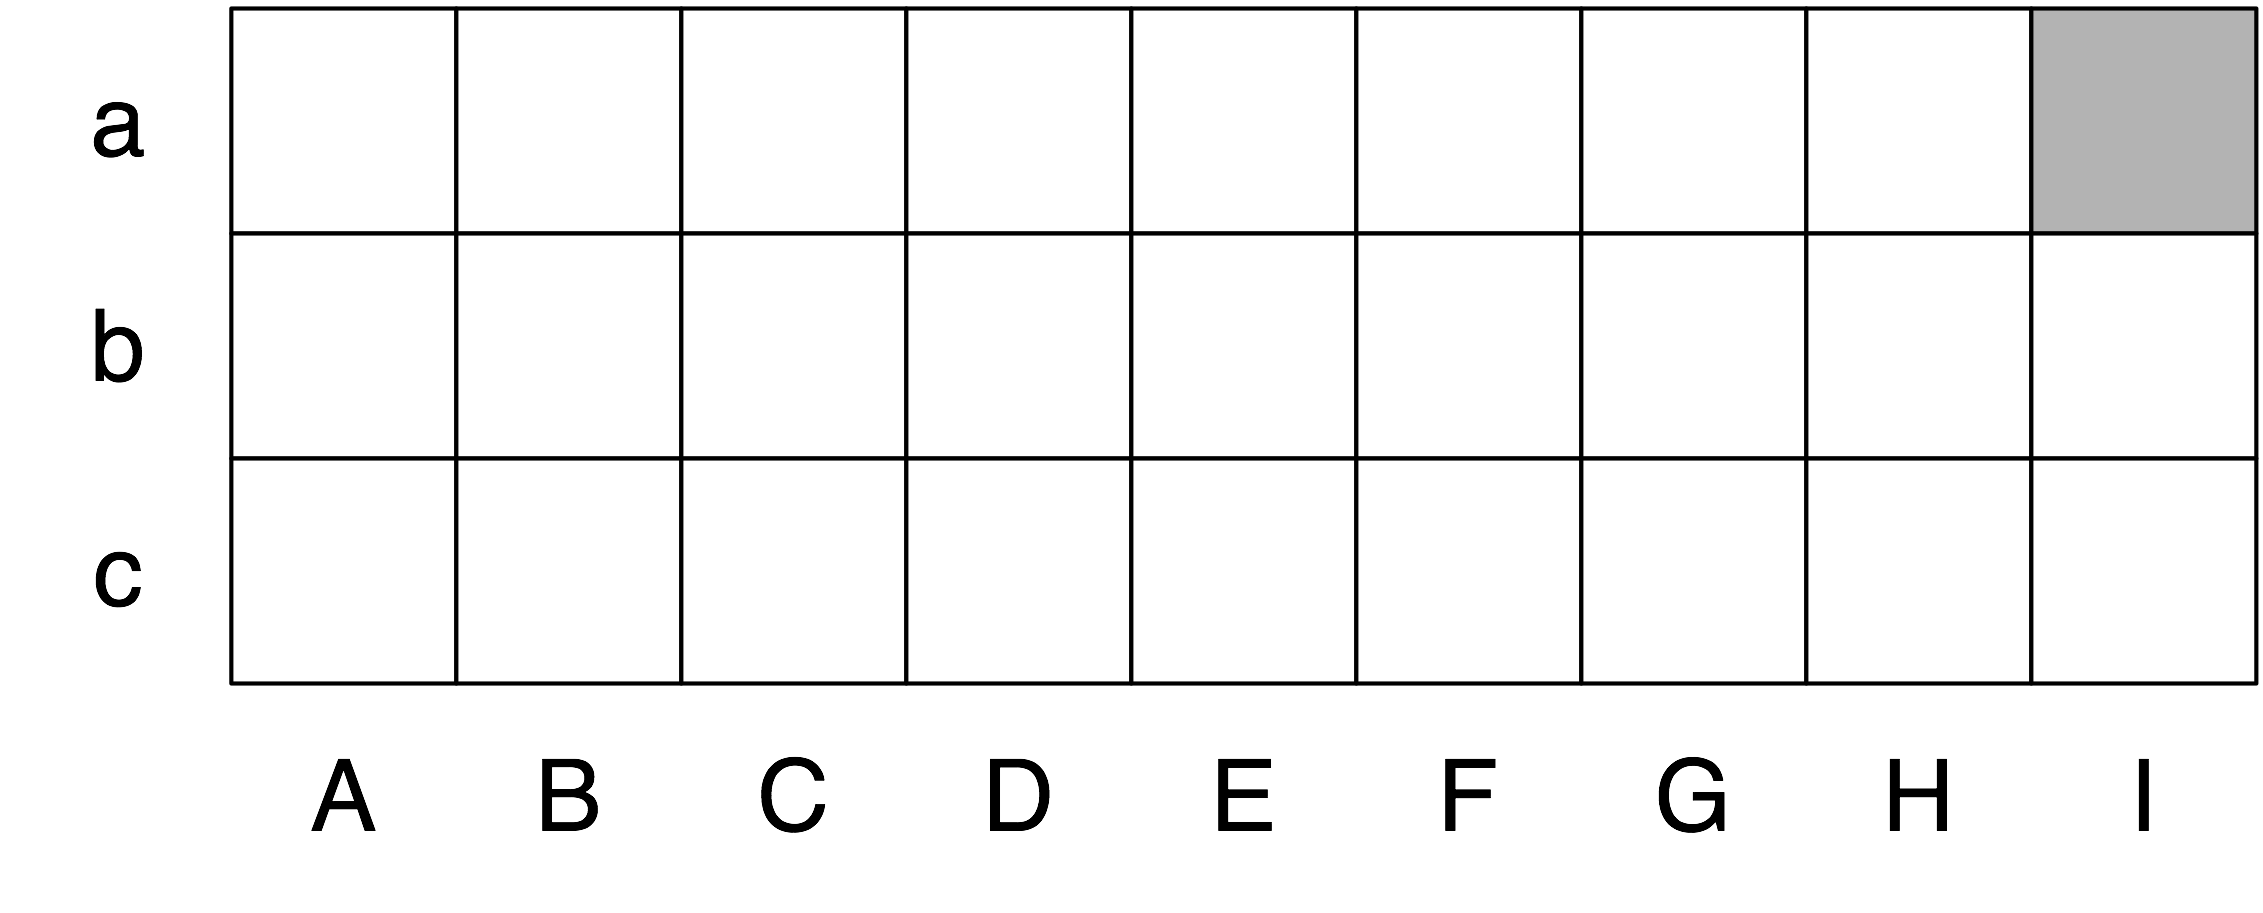

### 10.6.3. 重み付き文法

これまで見てきたように、あいまいさに対処することは、広範囲のパーサーを開発する際の重要な課題です。チャートパーサーは、同じ文の複数の解析の計算効率を向上させますが、膨大な数の解析の可能性がまだあります。重み付き文法と確率的解析アルゴリズムは、これらの問題に対する効果的な解決策を提供してきました。

これらを見る前に、文法性の概念がなぜ『連続的』になり得るのかを理解する必要があります。「give」という動詞は、直接の目的語（与えられているもの）と間接的な目的語（受け手）の両方が必要です。

これらの補語は、以下の2文に示すようにどちらの順序でも与えることができます。(a)の "前置詞与格"では、直接目的語が最初に現れ、その後に間接目的語を含む前置詞句が続きます。

- (a) Kim gave a bone to the dog.
- (b) Kim gave the dog a bone.

(b) の"二重目的語"形式では、間接目的語が最初に現れて、その後に直接目的語が続く。どちらも許容できる。しかしながら、間接目的語が代名詞である場合に、二重目的語構成に対する強い選り好みが働く。

- (a) Kim gaves the heebie-jeebies to me (前置詞与格).
- (b) Kim gaves me the heebie-jeebies (二重目的格).

Penn Treebankのサンプルを用いて「give」に対する前置詞与格と2重目的語の構成についての全てのインスタンスを調べることができる。

In [ ]:
def give(t):
    return t.label() == 'VP' and len(t) > 2 and t[1].label() == 'NP'\
           and (t[2].label() == 'PP-DTV' or t[2].label() == 'NP')\
           and ('give' in t[0].leaves() or 'gave' in t[0].leaves())
def sent(t):
    return ' '.join(token for token in t.leaves() if token[0] not in '*-0')
def print_node(t, width):
        output = "%s %s: %s / %s: %s" %\
            (sent(t[0]), t[1].label(), sent(t[1]), t[2].label(), sent(t[2]))
        if len(output) > width:
            output = output[:width] + "..."
        print(output)

In [ ]:
for tree in nltk.corpus.treebank.parsed_sents():
    for t in tree.subtrees(give):
        print_node(t, 72)

gave NP: the chefs / NP: a standing ovation
give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
give NP: it / PP-DTV: to the politicians
gave NP: them / NP: similar help
give NP: them / NP: 
give NP: only French history questions / PP-DTV: to students in a Europe...
give NP: federal judges / NP: a raise
give NP: consumers / NP: the straight scoop on the U.S. waste crisis
gave NP: Mitsui / NP: access to a high-tech medical product
give NP: Mitsubishi / NP: a window on the U.S. glass industry
give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
give NP: your Foster Savings Institution / NP: the gift of hope and free...
give NP: market operators / NP: the authority to suspend trading in futu...
gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
give NP: the Transportation Department / NP: up to 50 days to review any...
give NP: the president / NP: such power
give NP: me / NP: the heebie-jeebies
give NP: holders / NP: 

確率文脈自由文法: 各生成規則に確率が関連付けられている文脈自由文法。
 -> 計算はVitarbi Algorithm (動的計画法ベース）を用いる。

In [ ]:
grammar = nltk.PCFG.fromstring("""
    S    -> NP VP              [1.0]
    VP   -> TV NP              [0.4]
    VP   -> IV                 [0.3]
    VP   -> DatV NP NP         [0.3]
    TV   -> 'saw'              [1.0]
    IV   -> 'ate'              [1.0]
    DatV -> 'gave'             [1.0]
    NP   -> 'telescopes'       [0.8]
    NP   -> 'Jack'             [0.2]
    """)

In [ ]:
print(grammar)

Grammar with 9 productions (start state = S)
    S -> NP VP [1.0]
    VP -> TV NP [0.4]
    VP -> IV [0.3]
    VP -> DatV NP NP [0.3]
    TV -> 'saw' [1.0]
    IV -> 'ate' [1.0]
    DatV -> 'gave' [1.0]
    NP -> 'telescopes' [0.8]
    NP -> 'Jack' [0.2]


In [ ]:
viterbi_parser = nltk.ViterbiParser(grammar)
for tree in viterbi_parser.parse(['Jack', 'saw', 'telescopes']):
    print(tree)

(S (NP Jack) (VP (TV saw) (NP telescopes))) (p=0.064)
